<a href="https://colab.research.google.com/github/freny-caicedo-endava/Pio.ML/blob/master/MLIntro_P2_RefiningTheModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> ![answer](https://drive.google.com/uc?export=view&id=1yj7jPO0w4Ayq1OxkpflWOE-BBdMd_O4k)

## Introduction to Machine Learning
###PART TWO: Refining the model 

# 1.  EVALUATION METRICS

**Confusion Matrix** is a performance measurement for machine learning classification problem, it is relatively simple to understand, but the related terminology can be confusing.

> ![answer](https://drive.google.com/uc?export=view&id=1nbipIp7_oIEFQzkuf9o9F4bB_9W2L9rc)

> ![answer](https://drive.google.com/uc?export=view&id=1Euhh_mSTMZwdyuanrFeDd4OeGgBRbFZn)







In [0]:
from sklearn.metrics import confusion_matrix

y_true = [1, 1, 0, 1, 0, 0, 1]
y_pred = [1, 0, 0, 1, 0, 0, 1]

confusion_matrix(y_true, y_pred)

array([[3, 0],
       [1, 3]])

**Accuracy:** Overall, how often is the classifier correct? When it predicts yes, how often is it correct?

(TP+TN)/total 

**Precision:** When it predicts the positive result, how often is it correct?
Fraction of positive predictions that are actually positive

TP/(TP+FP)

**Recall:** When it is actually the positive result, how often does it predict correctly?

How much of actual positive data  was predicted to be positive.

TP/(TP+FN)

> ![answer](https://drive.google.com/uc?export=view&id=1jPebdA_bJKgq9vFuQhpA8sbF-v8LoMKT)


---

*When Is Precision more important?*

Youtube recommendations, should it reccomend a product?

FP: bad user experience!

FN: not a big problem

---

*When Is Recall more important?*

Lung Carcer Warning from x-ray

FP: not a big problem

FN: person loses chance to live!!!

So, precision is important to avoid false positives.
And recall is important to avoid false negatives.

---


**F1 Scores:** is the harmonic average of the precision and recall.

Harmonic mean is a kind of average where result is closer to the lower number, so F1 score is colest to the smallest between Precision and Recall.

In [83]:
import statistics as s

values = [0.1, 0.8]

s.harmonic_mean(values)

0.17777777777777778

Note that F1 score gives equal importance to precision and recall.

**F-Beta score:** is the weighted harmonic mean of precision and recall.

The beta parameter determines the weight of recall in the combined score. 

*   *beta < 1* lends more weight to precision
*   *beta > 1* favors recall
*   *beta = 1* is just harmonic mean

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

y_true = [1, 1, 0, 1, 0, 0, 1]
y_pred = [1, 0, 0, 0, 0, 0, 0]

print(f'Accuracy: {accuracy_score(y_true, y_pred):.3f}')
print(f'Precision: {precision_score(y_true, y_pred)}')
print(f'Recall: {recall_score(y_true, y_pred)}')

print(f'HM {s.harmonic_mean([0.25, 1])}')
fbeta_score(y_true, y_pred, 999)

Accuracy: 0.571
Precision: 1.0
Recall: 0.25
HM 0.4


0.2500001878755162

# 2.  DETECTING ERRORS

## 2.1 TYPES OF ERRORS 

**UNDERFITTING**

Does not do well on the training set.
Error due to bias.

**OVERFITTING**

Does well on the training set, but it tends to memorize it instead of learning the characteristics of it.
Error due to variance.


> ![answer](https://drive.google.com/uc?export=view&id=1psGrlora0dAitbFqKYnHWpAoKLrieW7V)

## 2.2 CROSS VALIDATION

Cross-validation is a statistical method used to estimate the skill of machine learning models.

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. 

The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation.

Very useful when we have few data.

> ![answer](https://drive.google.com/uc?export=view&id=1t_V8pJo000_ybbohxeuHqZlnrjz-RsPi)



# 3. DATA PRE-PROCESSING

## 3.1 Handling Null Values

In [12]:
import pandas as pd
from io import StringIO

csv_data = \
'''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
9.0,10.0,11.0,
'''

df = pd.read_csv(StringIO(csv_data))

df
df.isnull()
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

**How to fix it?**

In [0]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN' , strategy='mean')

df[['C','D']] = imputer.fit_transform(df[['C','D']])

df

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,9.0,10.0,11.0,6.0


## 3.2 Standardization 

In Standardization we transform our values such that the mean of the values is 0 and the standard deviation is 1.

![answer](https://drive.google.com/uc?export=view&id=1lNdkOnerB69nZ5IpgeKDY8Ci-63-O9Du)

![answer](https://drive.google.com/uc?export=view&id=1uw9iuGjtipnNYZ7Rctha2s39KDnjh2Ys)

    Country   Age   Salary
0  Colombia  44.0  72000.0
1     Spain  27.0  48000.0
2   Germany  30.0  54000.0
3  Colombia  38.0  61000.0
4   Germany  70.0  63000.0



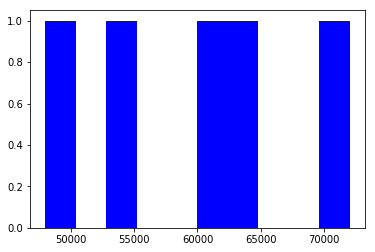

    Country       Age    Salary
0  Colombia  0.143647  1.518987
1     Spain -0.966351 -1.420988
2   Germany -0.770469 -0.685994
3  Colombia -0.248117  0.171499
4   Germany  1.841290  0.416497



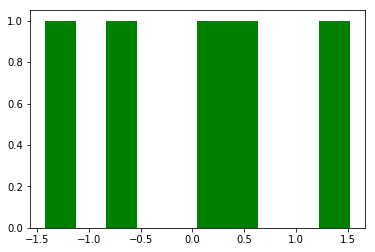

In [28]:

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

csv_data = \
'''
Country,Age,Salary
Colombia,44.0,72000.0
Spain,27.0,48000.0
Germany,30.0,54000.0
Colombia,38.0,61000.0
Germany,70.0,63000.0
'''

df = pd.read_csv(StringIO(csv_data))
print(df, end='\n\n')

plt.hist(df['Salary'], 10, facecolor='blue')
plt.show()

df[['Age','Salary']] = StandardScaler().fit_transform(df[['Age','Salary']])
print(df, end='\n\n')

plt.hist(df['Salary'], 10, facecolor='green')
plt.show()


## 3.3 Handling Categorical Variables

Categorical variables are basically the variables that are discrete and not continuous, they are further divided into 2 types and we need to preprocess them differently.


### 3.3.1 ORDINAL

Can be ordered, e.g.  size of a T-shirt, we can say that M<L<XL.

In [0]:
df_cat = pd.DataFrame(data = 
                     [['green','M'],
                      ['blue','L'],
                      ['green','S'],
                      ['white','M']])
df_cat.columns = ['color','size']

df_cat

,color,size
0,green,M
1,blue,L
2,green,S
3,white,M


In [0]:
size_mapping = {'S': 0,'M':1,'L':2}
df_cat['size'] = df_cat['size'].map(size_mapping)

df_cat

,color,size
0,1,1
1,0,2
2,1,0
3,2,1


### 3.3.2 NOMINAL

Can’t be ordered., e.g. color of a T-shirt., we can’t say that Blue < Green.

**Label Encoder**

Encode labels with value between 0 and n_classes-1.

In [0]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
df_cat['color'] = class_le.fit_transform(df_cat['color'].values)

df_cat

,color,size
0,1,1
1,0,2
2,1,0
3,2,1



**One-Hot Encoding**

This method creates *n* columns where *n* is the number of unique values that the nominal variable can take, for each encoded value only one column have value = 1 and the rest all will have value = 0.

In [9]:
from sklearn.preprocessing import OneHotEncoder

df_cat = pd.DataFrame(data = 
                      [['green'],
                       ['blue'],
                       ['green'],
                       ['white']])
df_cat.columns = ['color']

print(df_cat.head(), end='\n\n')

values = df_cat.color.values.reshape(-1,1)
encoded = OneHotEncoder().fit_transform(values).toarray()

encoded

   color
0  green
1   blue
2  green
3  white



array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# 4. TUNNING

## 4.1 LOSS FUNCTION

It’s a method of evaluating how well specific algorithm models the given data. If predictions deviates too much from actual results, the result will output a large number. 

A basic loss function will simply measure the absolute difference between our prediction and the actual value and average it out across the whole dataset.

In mathematical notation, it might look something like abs(y_predicted – y) 


![answer](https://drive.google.com/uc?export=view&id=1-nM2-cT6I0KMlzQLT3PSmxBTu97IcQPb)



## 4.2 HYPERPARAMETERS

In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins, they are not derived via training.

Hyperparameter optimization finds values that yields an optimal model which minimizes a loss function on given test data.



## 4.3 BENCHMARK MODEL

Benchmarking is the process of comparing your result to existing methods. 

You may compare to published results from another paper, for example. Or you might compare to a very simple model (a simple regression, K Nearest Neighbors). 

If the field is well studied, you should probably benchmark against the current published state of the art (and possibly against human performance when relevant).


# 5. REFINING PREVIOUS MODEL

## 5.1 DATA PREPROCESSING

In [0]:
import pandas as pd

# load to Pandas Dataframe and preview
df = pd.read_csv('census.csv', header=0)

df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [0]:
from sklearn.preprocessing import LabelEncoder

df['income'] = LabelEncoder().fit_transform(df['income'])
df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [0]:
y = df['income']
df = df.drop('income', axis=1)

y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [0]:
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# handle Null values and Normalize data in numerical columns

numeric_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

imputer = Imputer(missing_values='NaN' , strategy='median')
scaler = StandardScaler()

for col_name in numeric_cols:
    df[[col_name]] = imputer.fit_transform(df[[col_name]])
    df[[col_name]] = StandardScaler().fit_transform(df[[col_name]])

df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba


In [0]:
# Handle Null values in categorical cols

categorical_cols = ['workclass', 'education_level', 'marital_status',
                    'occupation', 'relationship', 'race', 'sex', 
                    'native_country']

# Null values

imputer = SimpleImputer(missing_values='missing' , strategy='constant')

for col_name in categorical_cols:
    df[[col_name]] = imputer.fit_transform(df[[col_name]])
    

# # Categorical Ordinal

eduLevel_mapping = {
    ' Preschool': 0,
    ' Some-college':1,
    ' 1st-4th':2,
    ' 5th-6th':3,
    ' 7th-8th':4,
    ' 9th':5,
    ' 10th':6,
    ' 11th':7,
    ' 12th':8,
    ' HS-grad':9,
    ' Bachelors':10,
    ' Masters':11,
    ' Prof-school':12,
    ' Assoc-acdm':13,
    ' Assoc-voc':14,
    ' Doctorate':15
}

df['education_level'] = df['education_level'].map(eduLevel_mapping)


df.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.034201,State-gov,10,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States
1,0.866417,Self-emp-not-inc,10,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States
2,-0.041455,Private,9,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States
3,1.093385,Private,7,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States
4,-0.798015,Private,10,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba


In [0]:

# Categorical Nominal
df = pd.get_dummies(df)

df.head()

,age,education_level,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,...,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.034201,10,1.128753,0.142888,-0.21878,-0.078120,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.866417,10,1.128753,-0.146733,-0.21878,-2.326738,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.041455,9,-0.438122,-0.146733,-0.21878,-0.078120,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.093385,7,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.798015,10,1.128753,-0.146733,-0.21878,-0.078120,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 5.2 TUNNING

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Decision Tree best parameters

t0 = time.time()

param_grid = { 
    'max_depth': [15, 32, 64],
    'min_samples_split': [0.000001, 0.00001, 0.0001],
    'min_samples_leaf' : [0.0001, 0.001, 0.01]
}
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(df, y)

print(grid.best_params_)    
print(grid.best_score_)

print(f'{int(time.time()-t0)} seconds lapsed')



{'max_depth': 32, 'min_samples_leaf': 0.001, 'min_samples_split': 1e-06}
0.8563752156030251
48 seconds lapsed


In [0]:

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

t0 = time.time()

clf = DecisionTreeClassifier(max_depth=32, min_samples_split=0.000001, min_samples_leaf=0.001)
clf.fit(df, y)
print(f'DecisionTree, {time.time()-t0:.3f} seconds training.') 

scores = cross_val_score(clf, df, y, cv=5)
print(scores)
print(f"Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.5f})")

DecisionTree, 0.542 seconds training.
[0.85638474 0.85616363 0.86279713 0.85205661 0.85447307]
Accuracy: 0.86 (+/- 0.00713)
